# MAE - Scientific Computing 1 - BE1                                                                #
##       The Heat equation in 1D         
## 1- The model
The goal of the work is to implement the discretization by finite difference scheme
of the heat equation with source term $f$ on the interval $\Omega=[a,b]$ for a given time interval $[0,t_{\text{final}}]$ to approximate $u(t,x)$ :
\begin{equation}\label{eq-heat}
\left \{
\begin{array}  {l}
 \partial_t u - \mu \partial_{xx} u = f , \quad t \in[0,t_{\text{final}}] , \quad x\in[a,b], \\
 u(0,x)=u_{\text{init}}(x),\\
 u(t,a)=u_{\text{left}} \quad u(t,b)=u_{\text{right}}.
\end{array}
\right .
\end{equation}

The parameters of the problem are given by
- boundaries of the domain : ```a=0; b=1```
- number of inner nodes for the discretization : ```N=10``` and we consider uniform repartition
- discretization step size in space : 
``` dx=(b-a)/(N+1)```
- final time $t_{\text{final}}$ : ```tmax=0.2```
- diffusion coefficient $\mu$ : ```mu=1```
- discretization step size in time  : ```dt``` is defined using ```dt=(cfl*dx^2)/(2*mu)``` where ```cfl``` is one constant value 
  equals (for example) to  ```0.9```
- values at the boundaries ($u_{\text{left}}$ and $u_{\text{right}}$)  : ```uleft=0``` and ```uright=0```
- source term $f$  and  initial value  $u_{\text{init}}$ will be given in the following 
- unknowns are collected into on array of size ```N``` (boundary values are not unknowns)

### Job to do  
You have to complete the present jupyter-nootbook where there is #TODO and you have to replace ??? by the
approriate command.
Be careful, make regular backups.

## 2- Poisson PDE (Steady problem - No time)

If we consider the steady state problem, then no time appears and the problem is reduced to the classical Poisson problem to approximate $u(x)$:
\begin{equation}
\left \{
\begin{array}  {l}
 - \mu \partial_{xx} u = f , \quad x\in[a,b], \\
 u(a)=u_{\text{left}} \quad u(b)=u_{\text{right}}.
\end{array}
\right .
\end{equation}

In that section, we consider that the source term $f$ is given and equal to $$f(x) = x^4+3x+1$$
(we refer to the parameter section to define ```uleft```, ```uright```, ```N``` and so ```dx```).

## Initialization - Environment and variables

Read the documentation on ```spdiags``` command and make the link with the course.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numerical_methods
import figure


def f(value):
    return value**4 + 3*value + 1


x_left = 0
x_right = 1
u_left = 0
u_right = 0
t_max = 0.2
N = 10
mu = 1
dx = (x_right - x_left) / (N + 1)

x = (np.arange(N) + 1) * dx

### Question 1: 
Using centered finite difference formula you can define the classical scheme of second order (see the course).
$$
-\frac{u_{j+1} - 2u_j + u_{j-1}}{dx^2}=f_j,\ \ j=1,\cdots,N
$$
We recall that we have to use the notation $u_j$ for an approximation of $u(x_j)$ 
($x_j$ being nodes of a uniform mesh introduced before).

Assemble the linear system $AU=Rhs$ (construct $A$ and $b$) associated to that discretization where
$A$ is a matrix of dimension```NxN```, $Rhs$ is a vector of dimension ```N``` and ```U``` is the unknown vector of dimension ```N``` corresponding to $U=(u_1,\cdots,u_N)^T$.
You have to consider the parameters given into the introduction.  


To construct $A$ you can define iteratively each coefficient of the matrix or you can use ```spdiags``` command which is more efficient.


In [2]:
A = (mu / (dx**2)) * numerical_methods.iteration_matrix(-1, 2, -1, N)

Rhs = f(x)
Rhs[0] = Rhs[0] + (mu / (dx**2)) * u_left
Rhs[len(Rhs)-1] = Rhs[len(Rhs)-1] + (mu / (dx**2)) * u_right

print("dim(A) = ", np.shape(A))
print("dim(Rhs) = ", np.size(Rhs))

dim(A) =  (10, 10)
dim(Rhs) =  10


## Question 2
Solve the linear system $AU=Rhs$ and plot the solution $U$ for $x\in [a,b]$ (with boundaries : you can use ```np.insert```command to add boundaries or your own command).

What is the maximum value of $u(x)$ for $x \in [a,b]$ ? (you can use ```np.where```command or your own command).

In wich discret point do you have this maximum value ?

## Solution 
You must obtain this result
![sol.png](FIGURES/sol_poisson.png)

The max value is  0.3078798867213716  at the point x=0.54545455 (indexed by [6] - position into the vector)


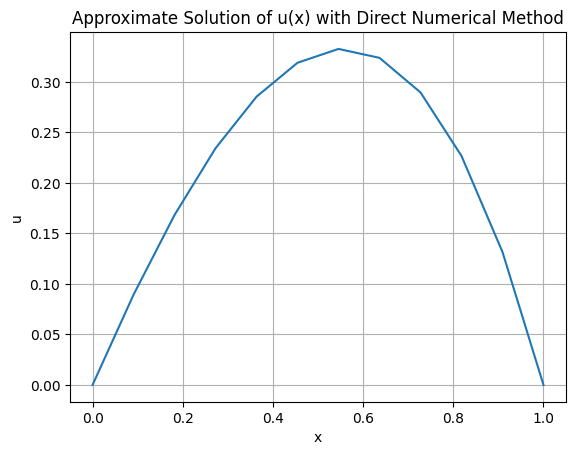

The max value is 0.3325423171993514 at the point (indexed by [5]) = [0.54545455]


In [3]:
u = np.linalg.solve(A, Rhs)

xx = np.copy(x)
xx = np.insert(xx, 0, 0.0)
xx = np.insert(xx, len(xx), dx * (N+1))

uu = np.copy(u)
uu = np.insert(uu, 0, u_left)
uu = np.insert(uu, len(uu), u_right)

plt.figure()
plt.plot(xx, uu)
plt.grid()
plt.xlabel('x')
plt.ylabel('u')
plt.title('Approximate Solution of u(x) with Direct Numerical Method')
plt.show()

figure.max_value(u, x)

# Complement 
In the present situation the expression of $f(x)$ is simple so it is possible to obtain manually
the expression of the exact solution.
- What is $u_{exact}$ for the given $f$.
- Plot the exact solution.

Then it is possible to compare the exact solution with the aproximated solution. 
- Plot the error.
- In which point do you have the maximum error ?
- For a given size of $dx$ that corresponds to a given choice for $N$, compute the maximum error that you have done $\displaystyle error_N=\max_{j=1,\cdots,N} |u_{exact}(x_j)-u_{approx}(x_j)|$ ($\longrightarrow$ $err_{N_1}$)
- Compute the errors for (at least) 2 others different values of $N$ ($\longrightarrow$ $err_{N_2}$ and $err_{N_3}$)
- Using the values $\{ (N_1,err_{N_1}), (N_2,err_{N_2}), (N_3,err_{N_3}) \}$, plot log(err) versus log(dx)
- What could you conclude concerning the plot. 

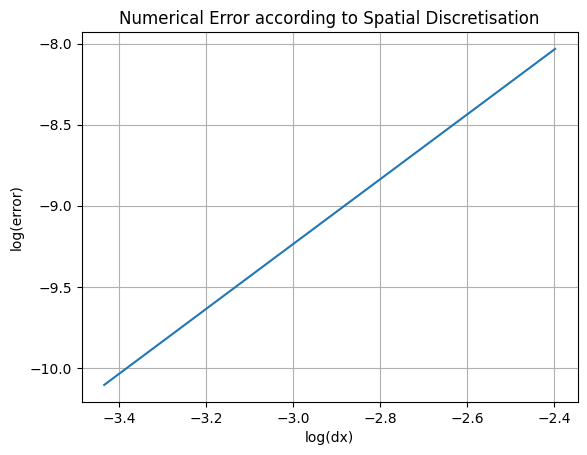

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import numerical_methods


def f(value):
    return value**4 + 3*value + 1


def q1(N):
    x_left = 0
    x_right = 1
    u_left = 0
    u_right = 0

    mu = 1
    dx = (x_right - x_left) / (N + 1)

    x = (np.arange(N) + 1) * dx
    A = (mu / (dx ** 2)) * numerical_methods.iteration_matrix(-1, 2, -1, N)

    Rhs = f(x)
    Rhs[0] = Rhs[0] + (mu / (dx ** 2)) * u_left
    Rhs[len(Rhs) - 1] = Rhs[len(Rhs) - 1] + (mu / (dx ** 2)) * u_right

    u = np.linalg.solve(A, Rhs)

    xx = np.copy(x)
    xx = np.insert(xx, 0, 0.0)
    xx = np.insert(xx, len(xx), dx * (N+1))

    uu = np.copy(u)
    uu = np.insert(uu, 0, u_left)
    uu = np.insert(uu, len(uu), u_right)

    u_exact = - (1/mu) * ((xx**6)/30 + (1/2)*(xx**3) + (1/2)*(xx**2) - (31/30)*xx)

    error = max(np.abs(u_exact - uu))
    return dx, error


log_dx = []
log_error = []
node_number = [10, 20, 30]

for node in node_number:
    dx, error = q1(node)
    log_dx.append(np.log(dx))
    log_error.append(np.log(error))

plt.figure()
plt.xlabel('log(dx)')
plt.ylabel('log(error)')
plt.plot(log_dx, log_error)
plt.grid()
plt.title('Numerical Error according to Spatial Discretisation')
plt.show()

## Heat equation (Unsteady problem - with time)
### Explicit scheme
In that section we consider the time dependent problem with no source term ($f=0$) and the boundary conditions remain constant  equal to zero ($u_{left}=0$ and $u_{right}=0$).
We are going to study the explicit scheme given by
$$
\begin{array}{ll}
& \displaystyle \frac{u^{n+1}_j-u^n_j}{dt} - \mu \frac{u^{n}_{j+1}-2u^{n}_{j}+u^{n}_{j-1}}{dx^2}=0,
\quad j=1:N,\\
&\\
\Longleftrightarrow 
& \displaystyle u^{n+1}_j =dt  \mu \frac{u^{n}_{j+1}-2u^{n}_{j}+u^{n}_{j-1}}{dx^2} + u^n_j ,
\quad j=1:N.\\
\end{array}
$$
In addition to Poisson problem, initial condition ($t=0$)  must be considered. 

For the first simulation we are going to take a parabolic profile given by
$$u_{init}(x)=x(1-x)$$

### Question 1:
- Construct an array ```uinit``` representing $u_{init}$. 
- Compute the numerical solution at each time step and save it into an array ```u```. 

The value of the array at the previous iteration time will be removed.

Particular attention must be done to consider the boundary condition values.

- For each time iteration, plot the approximated solution given by the scheme.
- Increasing the time step from ```cfl=0.9```to  ```cfl=1.5```, observe the behavior of the scheme.
- At the end you must obtain the plot corresponding to the final time ```tmax``.
- What is the maximum value of $u(x,t_{max})$ for $x \in [a,b]$ ? (you can use ```np.where```command or your own command).
- In wich discret point do you have this maximum value ?


In [5]:
from IPython import display
import time
import math
import numpy as np
import matplotlib.pyplot as plt
import initial_distribution


def explicit_scheme(distribution, cfl):
    title = 'Solution of u(t,x) with Explicit Scheme'
    x_label = 'x'
    y_label = 'u'

    x_left = 0
    x_right = 1
    u_left = 0
    u_right = 0

    N = 10
    mu = 1

    dx = (x_right - x_left) / (N + 1)
    x = (np.arange(N) + 1) * dx

    dt = (cfl * (dx ** 2.0)) / (2 * mu)

    u_init, u_min, u_max = initial_distribution.f(x, distribution)

    u_min = u_min - 0.1
    u_max = u_max + 0.1

    t = 0
    t_max = 0.2

    u = u_init
    u_new = np.copy(u)

    figure.plot(x, u_new, u_left, u_right, u_min, u_max, x_left, x_right, x_label, y_label, title, notebook=True)

    while t < t_max:
        t = t + dt

        u_new = numerical_methods.explicit_scheme(u, np.zeros(np.size(u)), dt, dx, mu, u_left, u_right)

        u = np.copy(u_new)

        figure.plot(x, u_new, u_left, u_right, u_min, u_max, x_left, x_right, x_label, y_label, title, notebook=True)

    figure.max_value(u_new, x)

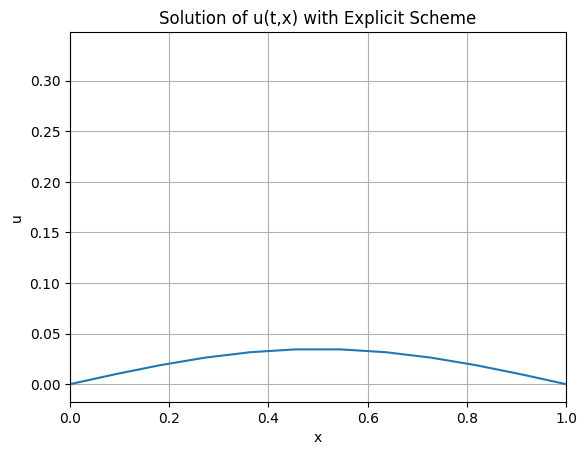

The max value is 0.03437486521505695 at the point (indexed by [4 5]) = [0.45454545 0.54545455]


In [6]:
plt.figure()
explicit_scheme('A', 0.9)

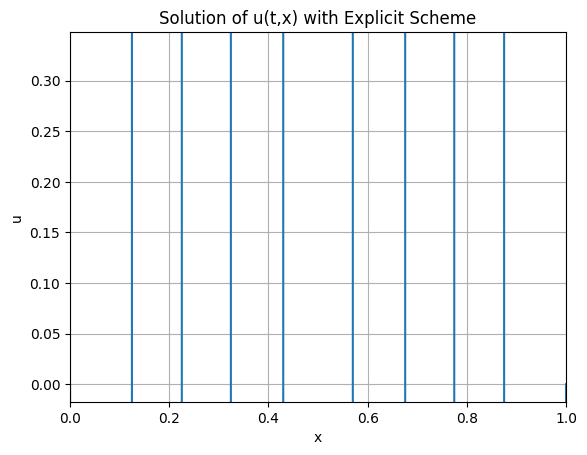

The max value is 28550.98690443665 at the point (indexed by [8]) = [0.81818182]


In [7]:
plt.figure()
explicit_scheme('A', 1.5)

## Solution 
You must obtain for the last plot (t=tmax).

For cfl = 0.9 

![sol.png](FIGURES/explicit_0_9.png)

The max value is  0.03437486521505695  at the points (indexed by [4, 5] ) =  [0.45454545 0.54545455]


For cfl = 1.5

![sol.png](FIGURES/explicit_1_5.png)

The max value is  28550.98690443705  at the point (indexed by [8] ) =  [0.81818182]

To observe different phenomena, several initial data can be considered.

- [A] Parabolic (already studied):
$u_{init}(x)=x(1-x)$
- [B] Gaussian :
$u_{init}(x)=e^{-500(x-0.5)^2}$
- [C] Heaviside (to observe the regularization) :
$u_{init(x)}=\left \{
\begin{array}{l}
1 \mbox{ if } x \in[\frac{1}{3};\frac{2}{3}]\\
0 \mbox{ elsewhere}\\
\end{array}
\right .
$
- [D] High frequency :
$u_{init}(x)=\sin(16\pi x)$
- [E] Low frequency :
$u_{init}(x)=\sin(2\frac{\pi}{b}x)$
- [F] High and low  frequencies :
$u_{init}(x)=\sin(4\pi x)+0.2\sin(40\pi x)$

You have to do the same job (as the parabolic data) for each initial data.

In particular what do you observe when you increase the time step (that corresponds to modify  ```cfl```) ?

In [8]:
from IPython import display
import time
import math
import numpy as np
import matplotlib.pyplot as plt
import initial_distribution

def explicit_scheme(distribution, cfl):
    x_label = 'x'
    y_label = 'u'

    x_left = 0
    x_right = 1
    u_left = 0
    u_right = 0

    N = 10
    mu = 1

    dx = (x_right - x_left) / (N + 1)
    x = (np.arange(N) + 1) * dx

    dt = (cfl * (dx ** 2.0)) / (2 * mu)

    u_init, u_min, u_max = initial_distribution.f(x, distribution)

    u_min = u_min - 0.1
    u_max = u_max + 0.1

    t = 0
    t_max = 0.2

    u = u_init
    u_new = np.copy(u)

    title = 'Solution of u(t,x) with Explicit Scheme - Initial Distribution ' + distribution
    figure.plot(x, u_new, u_left, u_right, u_min, u_max, x_left, x_right, x_label, y_label, title, notebook=True)

    while t < t_max:
        t = t + dt

        u_new = numerical_methods.explicit_scheme(u, np.zeros(np.size(u)), dt, dx, mu, u_left, u_right)
        u = np.copy(u_new)

        title = 'Solution of u(t,x) with Explicit Scheme - Initial Distribution ' + distribution
        figure.plot(x, u_new, u_left, u_right, u_min, u_max, x_left, x_right, x_label, y_label, title, notebook=True)

    figure.max_value(u_new, x)

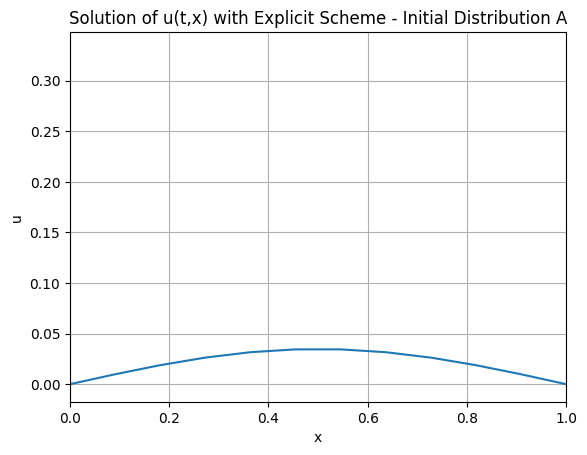

The max value is 0.03437486521505695 at the point (indexed by [4 5]) = [0.45454545 0.54545455]


In [9]:
cfl = 0.9

plt.figure()
explicit_scheme('A', cfl)

In [10]:
plt.figure()
explicit_scheme('B', cfl)

The max value is 0.017072155554235198 at the point (indexed by [4 5]) = [0.45454545 0.54545455]


In [11]:
plt.figure()
explicit_scheme('C', cfl)

The max value is 0.09202561203532483 at the point (indexed by [4 5]) = [0.45454545 0.54545455]


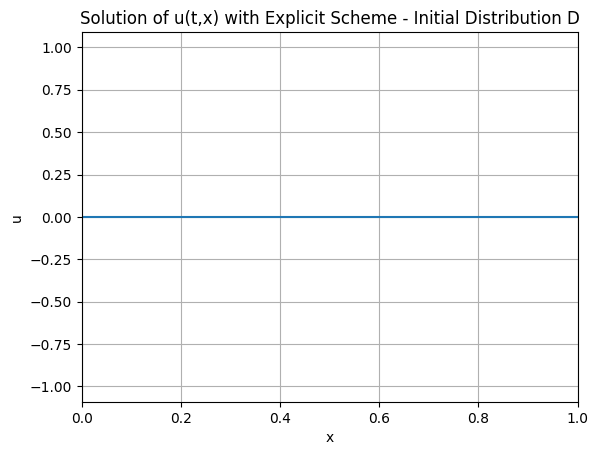

The max value is -1.7869541681553696e-17 at the point (indexed by [0]) = [0.09090909]


In [12]:
plt.figure()
explicit_scheme('D', cfl)

In [13]:
plt.figure()
explicit_scheme('E', cfl)

The max value is 0.00023989910450305103 at the point (indexed by [2]) = [0.27272727]


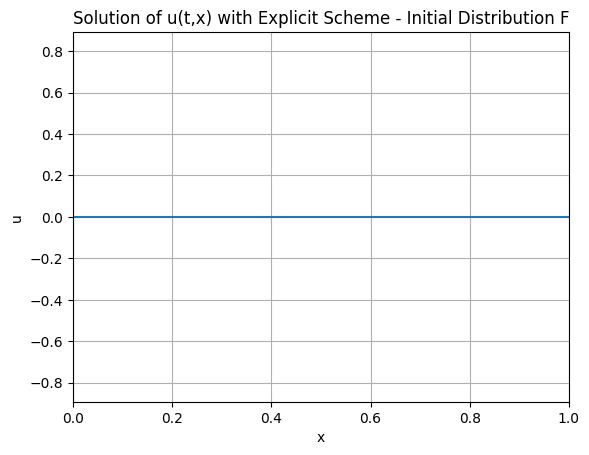

The max value is -1.0728040659950566e-17 at the point (indexed by [0]) = [0.09090909]


In [14]:
plt.figure()
explicit_scheme('F', cfl)

## Implicit scheme
We consider the implicit Euler scheme for the heat equation for $j=1,\cdots,N$
given by
$$
\displaystyle \frac{u^{n+1}_j-u^n_j}{dt} - \mu \frac{u^{n+1}_{j+1}-2u^{n+1}_{j}+u^{n+1}_{j-1}}{dx^2}=0
\Longleftrightarrow 
\displaystyle 
\left( -\frac{\mu dt} {dx^2} \right) u^{n+1}_{j+1}   + 
\left( 1+2\frac{ \mu dt }{dx^2} \right) u^{n+1}_{j}   + 
\left( -\frac{ \mu dt}{dx^2} \right) u^{n+1}_{j-1}  = u^n_j.
$$

### Question 1:
Reproduces the same steps as the explicit scheme:
- Construct an array ```uinit``` representing $u_{init}$.

  Test the same initial data used for the explicit scheme.

  Particular attention must be done to consider the boundary conditions.
- Compute the numerical solution at each time step and save it into an array ```u```. 
- For each time iteration, plot the approximated solution given by the scheme.
- Increasing the time step from ```cfl=0.9```to  ```cfl=1.5```, observe the behavior of the scheme.
- What is the maximum value of $u(x,t_{max})$ for $x \in [a,b]$ ? (you can use ```np.where```command or your own command).
- In wich discret point do you have this maximum value ?
- Compare the computational time required for the explicit and the implicit schemes for computing the same 
final solution at ```tmax=0.2```.
Comment/remove plotting in the loop to estimate the time laps.
You can use the commands (import timeit library)

```tic = timeit.default_timer()``` to initialise the time and


```toc = timeit.default_timer()``` to stop the time counter. 

Then to obtain the time you can use ```print(toc - tic)```.

In [15]:
from IPython import display
import math
import numpy as np
import matplotlib.pyplot as plt
import numerical_methods
import initial_distribution
import figure

def implicit_scheme(distribution, cfl):
    title = 'Solution of u(t,x) with Implicit Scheme'
    x_label = 'x'
    y_label = 'u'
    
    x_left = 0
    x_right = 1
    u_left = 0
    u_right = 0

    N = 10
    mu = 1

    dx = (x_right - x_left) / (N + 1)
    x = (np.arange(N) + 1) * dx

    dt = (cfl * (dx ** 2.0)) / (2 * mu)

    u_init, u_min, u_max = initial_distribution.f(x, distribution)

    u_min = u_min - 0.1
    u_max = u_max + 0.1

    t = 0
    t_max = 0.2

    u = u_init
    u_new = np.copy(u)

    figure.plot(x, u_new, u_left, u_right, u_min, u_max, x_left, x_right, x_label, y_label, title, notebook=True)

    while t < t_max:
        t = t + dt

        u_new = numerical_methods.implicit_scheme(u, np.zeros(np.size(u)), dt, dx, mu, u_left, u_right)

        u = np.copy(u_new)

        figure.plot(x, u_new, u_left, u_right, u_min, u_max, x_left, x_right, x_label, y_label, title, notebook=True)

    figure.max_value(u_new, x)

In [16]:
plt.figure()
implicit_scheme('A', 0.9)

The max value is 0.03693437523771966 at the point (indexed by [5]) = [0.54545455]


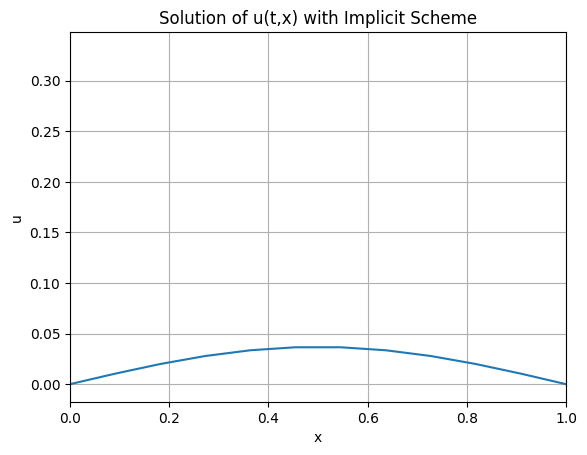

The max value is 0.036459630833615385 at the point (indexed by [4]) = [0.45454545]


In [17]:
plt.figure()
implicit_scheme('A', 1.5)

## Solution 
You must obtain for the last plot (t=tmax).

For cfl = 0.9 

![sol.png](FIGURES/implicit_0_9.png)

The max value is  0.03693437523771982  at the point (indexed by  [4] ) =  [0.45454545]


For cfl = 1.5

![sol.png](FIGURES/implicit_1_5.png)

The max value is  0.0364596308336154  at the point (indexed by  [5] ) =  [0.54545455]


In [18]:
import numpy as np
import timeit
import numerical_methods
import initial_distribution


def explicit_scheme_computational_time(distribution, cfl):
    x_left = 0
    x_right = 1
    u_left = 0
    u_right = 0

    N = 10
    mu = 1

    dx = (x_right - x_left) / (N + 1)
    x = (np.arange(N) + 1) * dx

    dt = (cfl * (dx ** 2.0)) / (2 * mu)

    u_init, u_min, u_max = initial_distribution.f(x, distribution)

    t = 0
    t_max = 0.2

    tic = timeit.default_timer()

    u = u_init
    u_new = np.copy(u)

    while t < t_max:
        t = t + dt

        u_new = numerical_methods.explicit_scheme(u, np.zeros(np.size(u)), dt, dx, mu, u_left, u_right)
        u = np.copy(u_new)

    toc = timeit.default_timer()

    print("Explicit Scheme | The computational time is: " + str(toc - tic) + ' s.')
    return toc - tic


def implicit_scheme_computational_time(distribution, cfl):
    x_left = 0
    x_right = 1
    u_left = 0
    u_right = 0

    N = 10
    mu = 1

    dx = (x_right - x_left) / (N + 1)
    x = (np.arange(N) + 1) * dx

    dt = (cfl * (dx ** 2.0)) / (2 * mu)

    u_init, u_min, u_max = initial_distribution.f(x, distribution)

    t = 0
    t_max = 0.2

    tic = timeit.default_timer()

    u = u_init
    u_new = np.copy(u)

    while t < t_max:
        t = t + dt

        u_new = numerical_methods.implicit_scheme(u, np.zeros(np.size(u)), dt, dx, mu, u_left, u_right)
        u = np.copy(u_new)

    toc = timeit.default_timer()

    print("Implicit Scheme | The computational time is: " + str(toc - tic) + ' s.')
    return toc - tic


time_explicit = explicit_scheme_computational_time('A', 0.9)
time_implicit = implicit_scheme_computational_time('A', 0.9)
print('The Explicit Scheme is ' + str(time_implicit/time_explicit) + ' times faster than the Implicit Scheme.')

Explicit Scheme | The computational time is: 0.0027027999749407172 s.
Implicit Scheme | The computational time is: 0.012770400033332407 s.
The Explicit Scheme is 4.724877960535171 times faster than the Implicit Scheme.


## Complement
We are going to work on the same PDE, the Heat equation with a source terme $f\ne 0$.
- What are the modification to do in the code to take into account this additional quantity (explicit and implicit schemes)?
- Find an exact solution of the heat equation with a source term and an initial condition of your choice.


  To obtain such solution :
  
      - first, you can choice one function u(t,x) and use it as inital solution (for t=0).
  
      - second, plug this function into the left hand side of the heat equation 
        to compute manually 
$$\displaystyle \partial_t u - \mu \partial_{xx} u$$ 
  
      - Finally, if you take this quantity for f then u(t,x) is the exact solution of your problem.



- Compare the numerical solution obtain using Explicit and Implicit scheme (use the exact solution as reference solution).




In this section the following $v(t,x)$ distribution has been considered:

$$\displaystyle v(t,x) = x (1 - x) sin(t)$$

This gives a source term $f_{v}(t,x)$ equals to:

$$\displaystyle f_{v}(t,x) = \frac{\partial v(t,x)}{\partial t} - \mu \frac{\partial^{2} v(t,x)}{\partial x^{2}} $$

$$\displaystyle f_{v}(t,x) = x (1 - x) cos(t) - \mu (1 - 2x) sin(t)$$

$u(t,x)$ has been solved for the source term $f_{v}(t,x)$:

$$\displaystyle \frac{\partial u(t,x)}{\partial t} - \mu \frac{\partial^{2} u(t,x)}{\partial x^{2}} = f_{v}(t,x) $$ 

Finally, the numerical error is plotted. The numerical error is considered as: $\left| u_{exact}(t,x)-u(t,x) \right|$ with $u_{exact}(t,x) = v(t,x)$.

In [19]:
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import numerical_methods
import figure


def f(value, time, mu):
    if isinstance(value, np.ndarray):
        res = np.array([])
        for x in value:
            res = np.append(res, (x * (1 - x)) * np.cos(time) - mu * (1 - 2*x) * np.sin(time))
        return res


def u_exact(value, time):
    return value * (1 - value) * np.sin(time)


def discretisation_error(cfl, scheme):
    title = 'Discretisation Error with ' + scheme + ' Scheme'
    x_label = 'x'
    y_label = 'Numerical Error'

    x_left = 0
    x_right = 1
    u_left = 0
    u_right = 0

    N = 10
    mu = 1

    dx = (x_right - x_left) / (N + 1)
    x = (np.arange(N) + 1) * dx

    dt = (cfl * (dx ** 2.0)) / (2 * mu)

    t = 0
    t_max = 0.2

    u_init = u_exact(x, t)

    u_min = np.min(u_init) - 0.1
    u_max = np.max(u_init) + 0.1

    u = u_init
    u_new = np.copy(u)

    figure.plot_discretisation_error(x, u_new, u_exact(x, t), u_left, u_right, u_min, u_max, x_left, x_right, x_label, y_label, title, notebook=True)

    while t < t_max:

        t = t + dt

        f_source = f(x, t, mu)
        
        if scheme.lower() == "implicit":
            u_new = numerical_methods.implicit_scheme(u, f_source, dt, dx, mu, u_left, u_right)
        elif scheme.lower() == "explicit":
            u_new = numerical_methods.explicit_scheme(u, f_source, dt, dx, mu, u_left, u_right)
        else:
            print("ERROR: Missing Scheme Specification!")

        u = np.copy(u_new)

        figure.plot_discretisation_error(x, u_new, u_exact(x, t), u_left, u_right, u_min, u_max, x_left, x_right, x_label, y_label, title, notebook=True)

    return x, np.abs(u_new - u_exact(x, t))

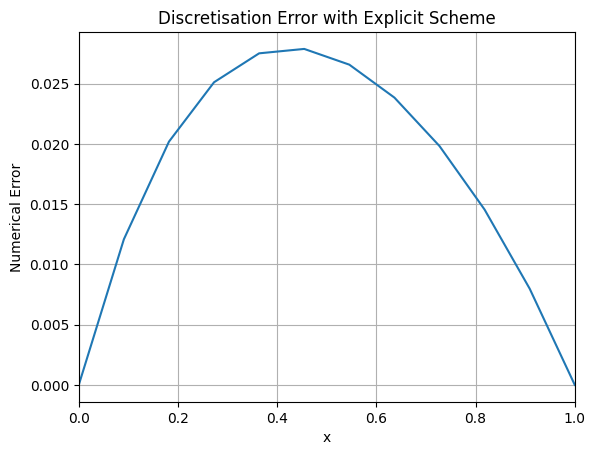

In [20]:
plt.figure()
x_explicit, e_explicit = discretisation_error(0.9, 'Explicit')

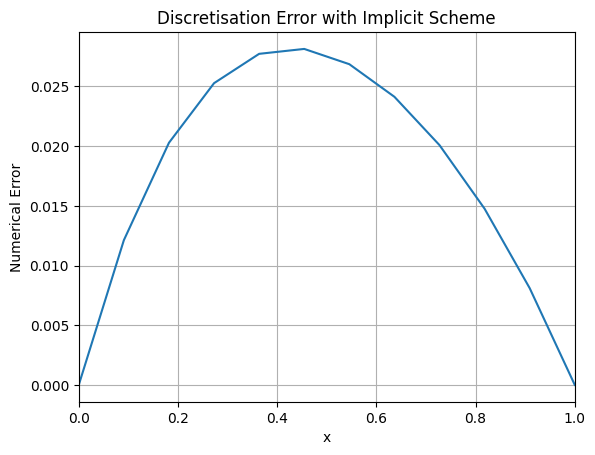

In [21]:
plt.figure()
x_implicit, e_implicit = discretisation_error(0.9, 'Implicit')

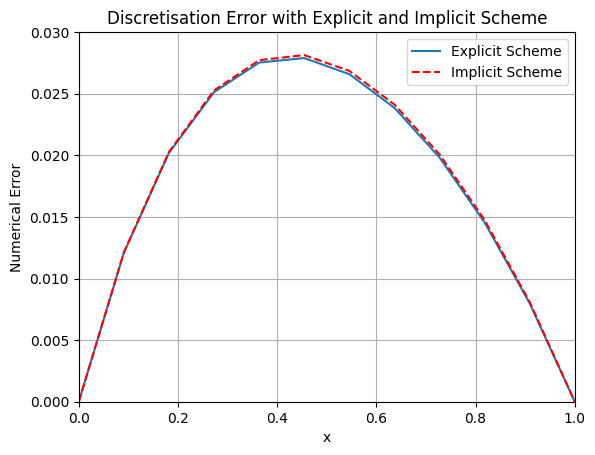

In [22]:
plt.figure()
figure.plot_discretisation_error_compare(x_explicit, e_explicit, x_implicit, e_implicit, 0.0, 0.0, 0.0, 0.03, 0.0, 1.0, 'x', 'Numerical Error', 'Discretisation Error with Explicit and Implicit Scheme')
plt.show(block=True)